___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Большой проверочный проект по обработке и визуализации данных

## Обзор

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? *Особенно* если та компания, которая занимается рейтингами и отзывами, *также* зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Вы будете применять Ваши навыки работы с pandas и навыки визуализации данных для того, чтобы определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

---
---

**Выполните шаги, написанные жирным шрифтом.**

---
----

## Часть 1: Исследуем данные


**ЗАДАНИЕ (ОПЦИОНАЛЬНО): Это задание не является обязательным, но если Вы хорошо знаете английский язык, то прочтите эту статью, по мотивам которой строится наш проект: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**ЗАДАНИЕ: Прочитайте описание двух .csv-файлов, которые мы будем далее загружать и обрабатывать:**

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

----

**ЗАДАНИЕ: Импортируйте библиотеки, которые по Вашему мнению могут Вам понадобиться:**

In [140]:
# импорт библиотек для анализа и визуализации данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.

**ЗАДАНИЕ: Выполните ячейку ниже для загрузки файла fandango_scrape.csv**

In [141]:
# загружаем данные из файла 
df = pd.read_csv("zxc.csv")


**ЗАДАНИЕ: Изучите свойства полученного объекта DataFrame - выведите несколько первых строк, а также общую информацию.**

In [142]:
# изучаем данные в столбцах
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [143]:
# анализируем информацию по DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [144]:
 # узнаём различные мат значения по DataFrame
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**ЗАДАНИЕ: Давайте изучим связь между популярностью фильма и его рейтингом. Нарисуйте график scatterplot, показывающий связь между колонками RATING и VOTES. Можете поменять стилизацию графика по Вашему вкусу.**

<Axes: xlabel='RATING', ylabel='VOTES'>

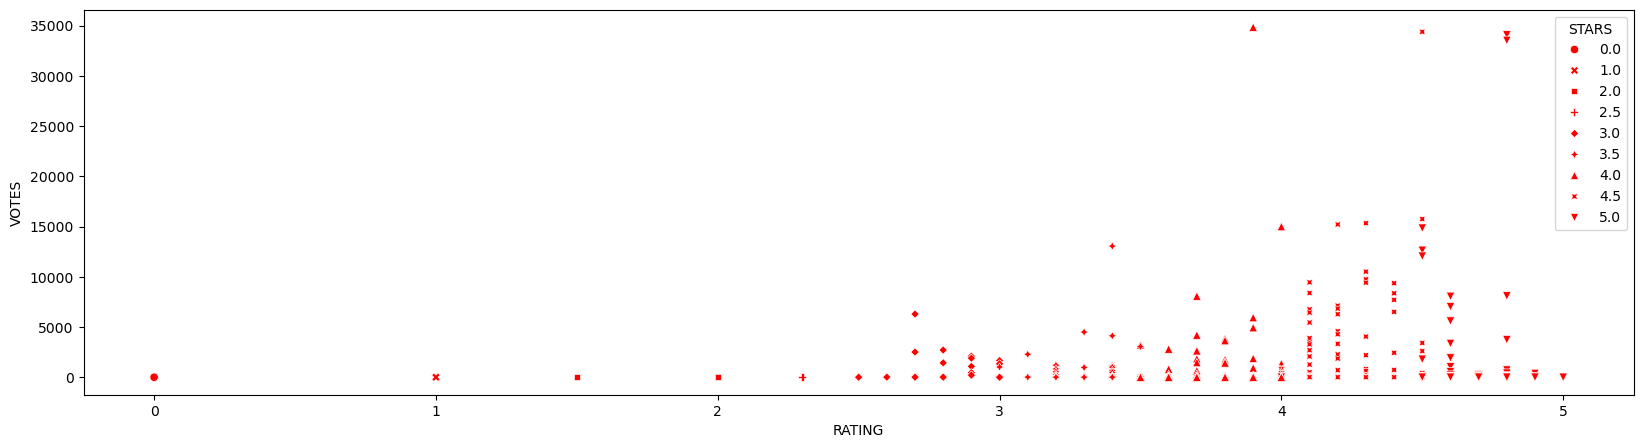

In [145]:
# Создаём визуализацию связи популярности и оценки фильмов
plt.figure(figsize = [20,5])
sns.scatterplot(data = df, x = 'RATING', y = 'VOTES',color = 'red', style = 'STARS')

**ЗАДАНИЕ: Вычислите корреляцию между колонками:**

In [146]:
# Вычисление кореляции меж колонками
df['RATING'].corr(df['VOTES'])

0.16376351276687406

**ЗАДАНИЕ: Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Создайте новую колонку, в ней возьмите из строки FILM только год, и назовите эту новую колонку YEAR**

In [147]:
# Создаём колонку с годом
df['YEAR'] = df['FILM'].apply(lambda x: x.split('(')[-1].replace(')',''))
df['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [148]:
df['FILM']

0               Fifty Shades of Grey (2015)
1                     Jurassic World (2015)
2                    American Sniper (2015)
3                          Furious 7 (2015)
4                         Inside Out (2015)
                       ...                 
499                        Valiyavan (2015)
500              WWE SummerSlam 2015 (2015)
501         Yagavarayinum Naa Kaakka (2015)
502    Yesterday, Today and Tomorrow (1964)
503                           Zarafa (2012)
Name: FILM, Length: 504, dtype: object

**ЗАДАНИЕ: Сколько фильмов содержится в наборе данных Fandango, в разбивке по годам?**

In [149]:
# Делаем groupby по годам на количество
df.groupby('YEAR')[['FILM']].count().sort_values( by = ['FILM'], ascending = False)


,FILM
YEAR,
2015,478
2014,23
1964,1
2012,1
2016,1


**ЗАДАНИЕ: Визуализируйте количество фильмов в год с помощью графика:**

<Axes: xlabel='YEAR', ylabel='count'>

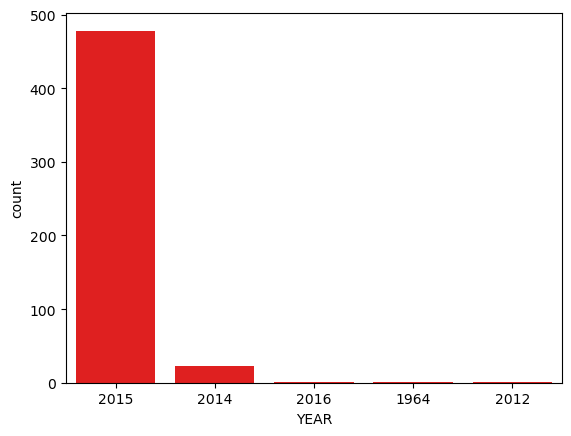

In [150]:
# Визуализируем данные
plt.figure()
sns.countplot(data = df,x = 'YEAR',color = 'red')

**ЗАДАНИЕ: Какие 10 фильмов получили наибольшее количество голосов (votes)?**

In [151]:
df.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**ЗАДАНИЕ: Сколько фильмов имеет нулевое количество голосов (votes)?**

In [152]:
df[df['VOTES'] == 0].count().iloc[0]

69

**ЗАДАНИЕ: Создайте DataFrame только с теми фильмами, которые имеют голоса (votes) - то есть, удалите те фильмы, у которых нет ни одного голоса.**

In [153]:
df_new = df[df['VOTES'] > 0]
df_new

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**

**ЗАДАНИЕ: Создайте график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING). Обрежьте диапазон KDE в пределах 0-5.**

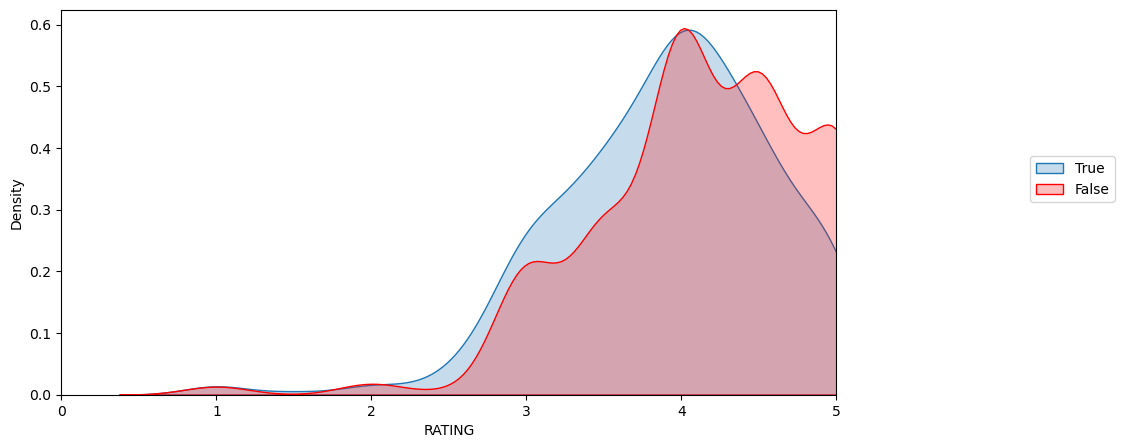

In [154]:
plt.figure(figsize = (10,5))
sns.kdeplot(data = df_new , x = 'RATING',fill = True, label = 'True')
sns.kdeplot(data = df_new , x = 'STARS',fill = True , color = 'red' , label = 'False')
plt.xlim(0,5)
plt.legend(loc = (1.25,0.5))

**ЗАДАНИЕ: Теперь давайте посчитаем эту разницу в численном виде; Создайте новую колонку, в которой сохраните разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING, а также выполните округление до одной десятичной цифры после запятой.**

In [155]:
df_new['ZXC'] = df_new['STARS'] - df_new['RATING']
df_new['ZXC'] = df_new['ZXC'].round(1)

C:\Users\R6ERKA 122\AppData\Local\Temp\ipykernel_15900\3740982894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ZXC'] = df_new['STARS'] - df_new['RATING']
C:\Users\R6ERKA 122\AppData\Local\Temp\ipykernel_15900\3740982894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ZXC'] = df_new['ZXC'].round(1)


In [156]:
df_new

,FILM,STARS,RATING,VOTES,YEAR,ZXC
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**ЗАДАНИЕ: Нарисуйте график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

<Axes: xlabel='ZXC', ylabel='count'>

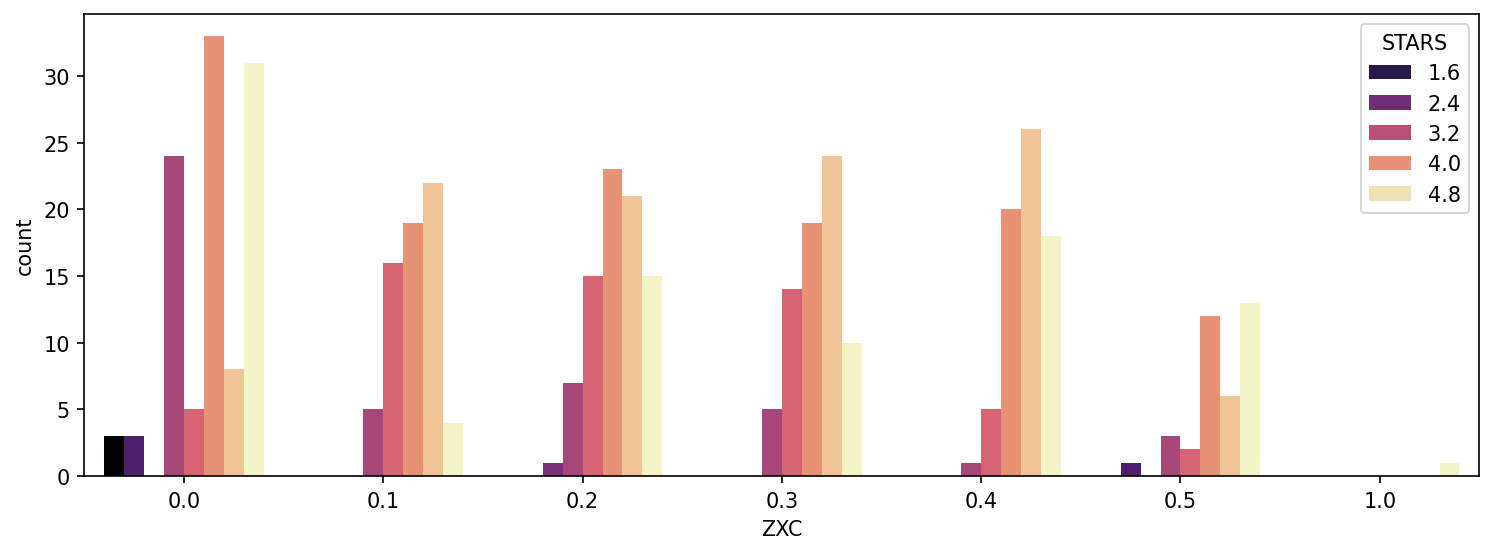

In [203]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data = df_new, x='ZXC',palette='magma', hue = 'STARS')

**ЗАДАНИЕ: На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Найдите этот фильм.**

In [158]:
df_new[df_new['ZXC'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,ZXC
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

**ЗАДАНИЕ: Выполните ячейку ниже, чтобы загрузить файл "all_sites_scores.csv"**

In [159]:
all_sites = pd.read_csv("all_sites_scores.csv")

**ЗАДАНИЕ: Изучите общие свойства полученного объекта DataFrame.**

In [160]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [161]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [162]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**ЗАДАНИЕ: Нарисуйте график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

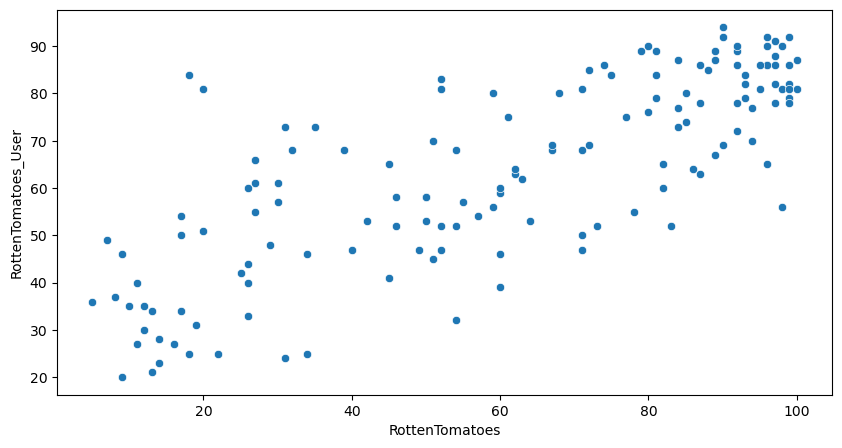

In [163]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

**ЗАДАНИЕ: Создайте новую колонку, в которой сохраните разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes. Используйте формулу RottenTomatoes-RottenTomatoes_User.**

In [164]:
all_sites['ZXC'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [165]:
all_sites['ZXC']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: ZXC, Length: 146, dtype: int64

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

**ЗАДАНИЕ: Вычислите среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше.**

In [166]:
all_sites['ZXC'].apply(abs).mean()

15.095890410958905

**ЗАДАНИЕ: Нарисуйте график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения. Для отображения этого распределения можете использовать как KDE, так и гистограммы.**

<Figure size 2000x500 with 0 Axes>

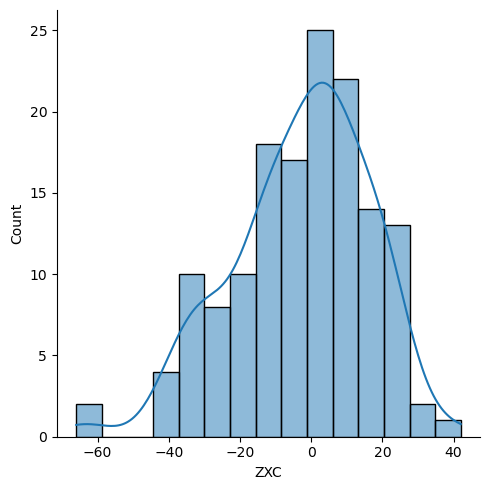

In [167]:
plt.figure(figsize = (20,5))
sns.displot(data = all_sites , x = 'ZXC', bins = 15,kde = True)

**ЗАДАНИЕ: Далее нарисуйте график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

<Figure size 2000x500 with 0 Axes>

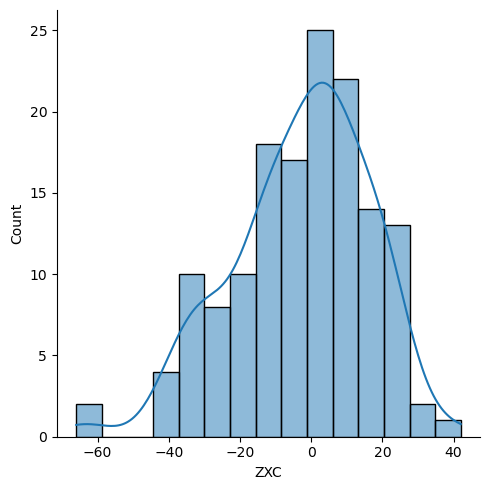

In [168]:
plt.figure(figsize = (20,5))
sns.displot(data = all_sites , x ='ZXC', bins = 15,kde = True)

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**ЗАДАНИЕ: Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [169]:
all_sites.nsmallest(5,'ZXC')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ZXC
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


**ЗАДАНИЕ: Далее наоборот - отобразите 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [170]:
all_sites.nlargest(5,'ZXC')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ZXC
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**ЗАДАНИЕ: Нарисуйте график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

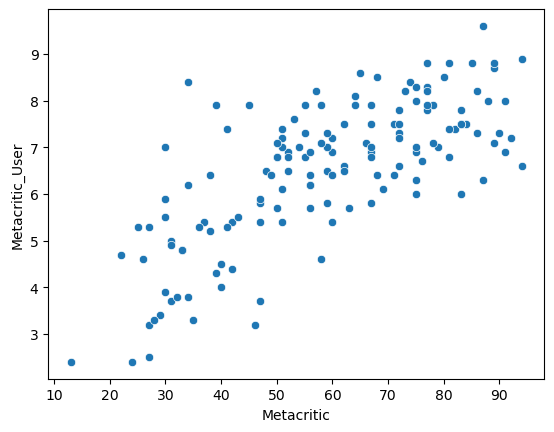

In [171]:
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**ЗАДАНИЕ: Нарисуйте график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

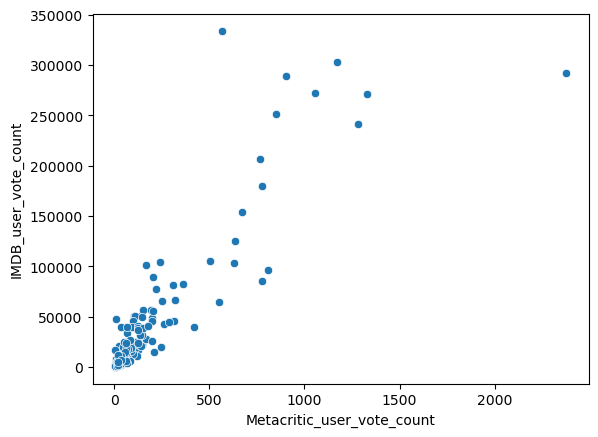

In [172]:
sns.scatterplot(data = all_sites, x = all_sites['Metacritic_user_vote_count'] , y = all_sites['IMDB_user_vote_count'])

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

**ЗАДАНИЕ: Какой фильм получил наибольшее количество голосов на IMDB?**

In [173]:
all_sites.nlargest(1,'IMDB_user_vote_count')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ZXC
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**ЗАДАНИЕ: Какой фильм получил наибольшее количество голосов на Metacritic?**

In [174]:
all_sites['Metacritic_user_vote_count'].max()

2375

## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**ЗАДАНИЕ: Объедините таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделайте объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [175]:
df10 = pd.merge(df,all_sites, on = 'FILM', how = 'inner')

In [176]:
df10

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ZXC
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [177]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  ZXC                         145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [178]:
df10.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ZXC
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратите внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

**ЗАДАНИЕ: Добавьте дополнительные колонки в all_sites, и запишите в них нормализованные значения рейтингов от 0 до 5. Это можно сделать разными способами.**

В качестве подсказки, можете прочитать вот эту статью: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Ещё одна подсказка - простой способ конвертации рейтингов:
* 100/20 = 5 
* 10/2 = 5

In [179]:
df10['RT_Norm'] = np.round(df10['RottenTomatoes']/20,1)
df10['RTU_Norm'] =  np.round(df10['RottenTomatoes_User']/20,1)


In [180]:
df10['Meta_Norm'] =  np.round(df10['Metacritic']/20,1)
df10['Meta_U_Norm'] =  np.round(df10['Metacritic_User']/2,1)
df10['IMDB_Norm'] = np.round(df10['IMDB']/2,1)

In [181]:
all_sites.describe().transpose()['max']

RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
ZXC                               42.0
Name: max, dtype: float64

In [182]:
df['RT_Norm'] = np.round(all_sites['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(all_sites['RottenTomatoes_User']/20,1)
df['Meta_Norm'] = np.round(all_sites['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(all_sites['Metacritic_User']/20,1)
df['IMDB_Norm'] = np.round(all_sites['IMDB']/2,1)

**ЗАДАНИЕ: Далее создайте DataFrame с названием norm_scores, в котором оставьте только нормализованные рейтинги. Также оставьте колонки STARS и RATING из исходной таблицы fandango.**

In [183]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RT_Norm', 'RTU_Norm',
       'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [184]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [185]:
df
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ZXC
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**ЗАДАНИЕ: Нарисуйте график, сравнивающий распределения нормализованных рейтингов от всех компаний. Это можно сделать разными способами, но попробуйте использовать Seaborn KDEplot (посмотрите документацию). Не беспокойтесь, если Ваш график будет выглядеть немного иначе нашего примера. Главное, чтобы были видны отличия между отдельными распределениями.**

p.s. если Вам нужно переместить легенду на графике seaborn kdeplot, то это можно сделать вот так: https://github.com/mwaskom/seaborn/issues/2280

(0.0, 6.0)

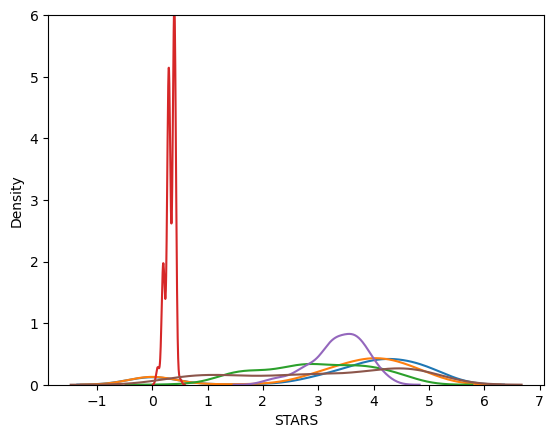

In [186]:
plt.figure()
sns.kdeplot(data = df,x = 'STARS')
sns.kdeplot(data = df,x = 'RATING')
sns.kdeplot(data = df,x = 'Meta_Norm')
sns.kdeplot(data = df,x = 'Meta_U_Norm')
sns.kdeplot(data = df,x = 'IMDB_Norm')
sns.kdeplot(data = df,x = 'RT_Norm')
plt.ylim(0,6)

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

**ЗАДАНИЕ: Нарисуйте график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.**

<Axes: ylabel='Density'>

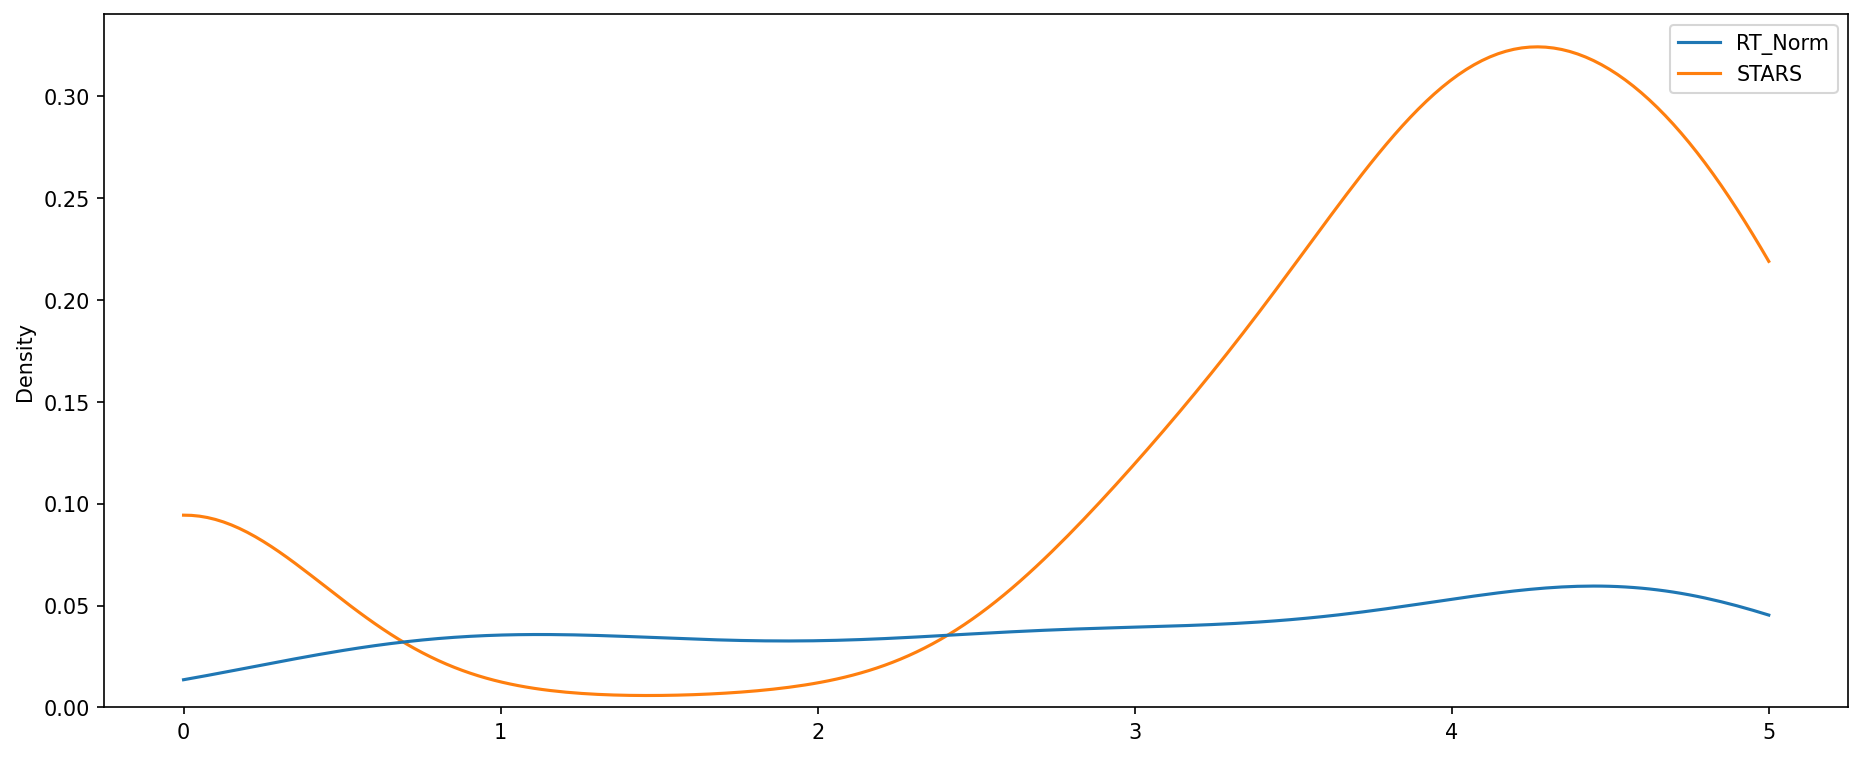

In [196]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],ax=ax)


**ОПЦИОНАЛЬНОЕ ЗАДАНИЕ: Нарисуйте график histplot, сравнивающий все нормализованные рейтинги.**


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**ЗАДАНИЕ: Нарисуйте график clustermap для всех нормализованных рейтингов. Обратите внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры. Замечание: для этого графика clustermap вовсе необязательно указывать колонку FILM в качестве индекса, так что при желании можете удалить эту колонку перед построением графика clustermap.**

<Axes: ylabel='Count'>

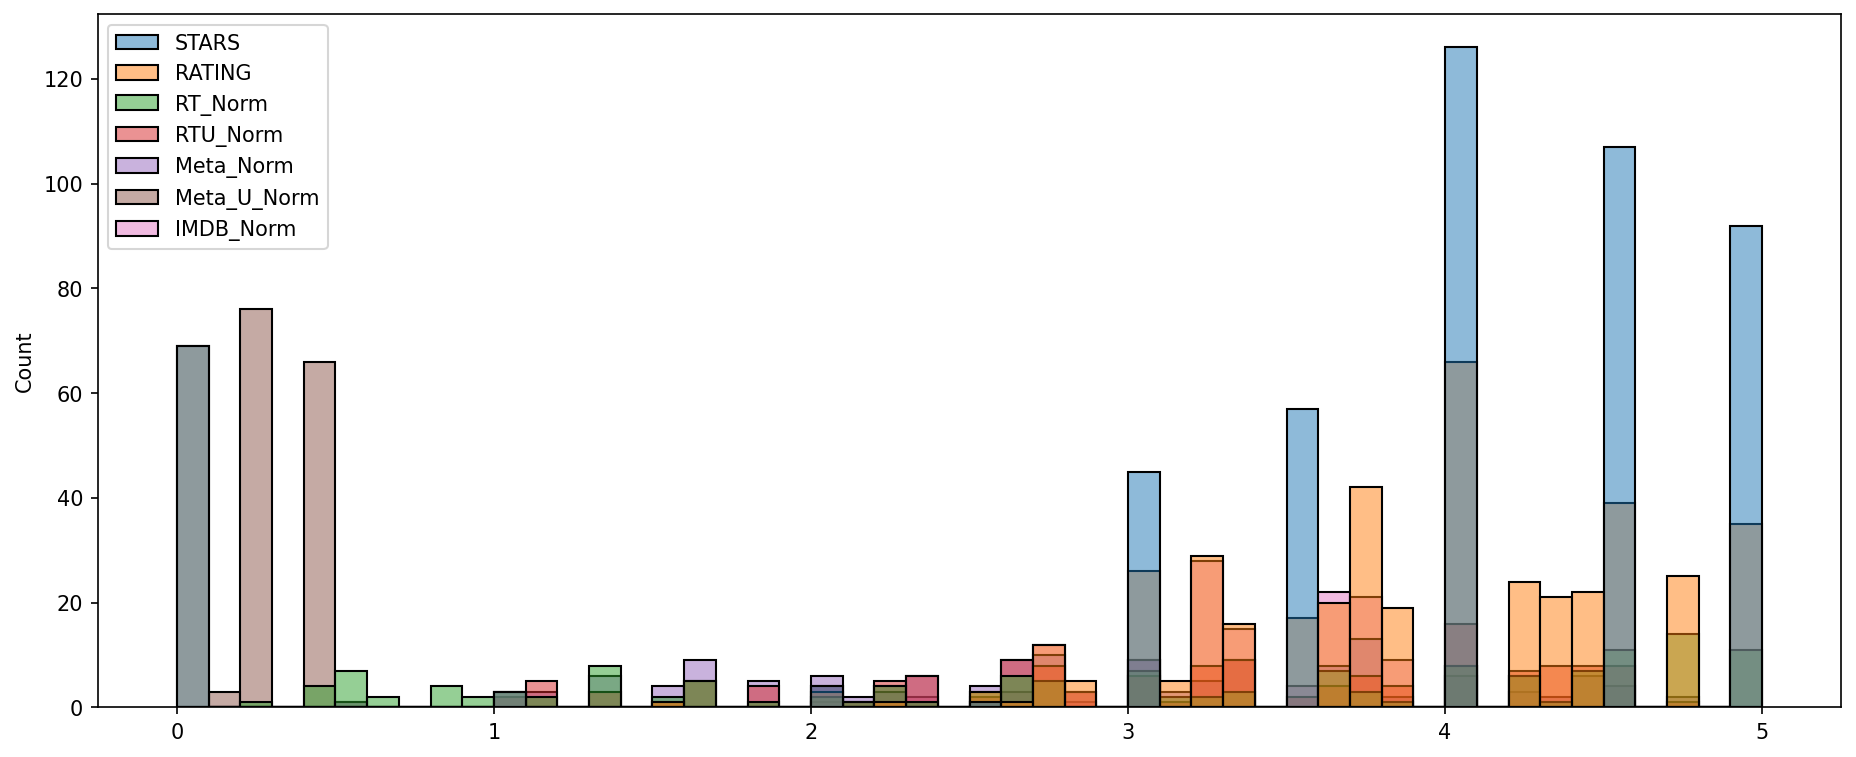

In [188]:

plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50)

**ЗАДАНИЕ: Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании? Возможно Вам понадобится колонка FILM, так что если вы удаляли её, то верните эту колонку обратно.**

In [189]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [190]:

norm_films.nsmallest(10,'RT_Norm')


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
133,4.0,3.9,0.2,1.8,0.6,0.1,2.2,Infinitely Polar Bear (2015)
15,4.5,4.3,0.4,2.3,1.3,0.2,3.0,Spy (2015)
48,4.5,4.2,0.4,1.0,1.4,0.1,2.0,The Age of Adaline (2015)
53,3.0,2.8,0.4,1.8,1.6,0.2,2.4,Poltergeist (2015)
105,3.5,3.4,0.4,2.4,1.4,0.2,3.0,Cake (2015)
33,4.5,4.1,0.5,1.8,1.5,0.3,2.3,Night at the Museum: Secret of the Tomb (2014)
35,4.5,4.2,0.6,2.0,1.2,0.1,3.2,Pitch Perfect 2 (2015)
58,3.0,2.7,0.6,1.8,1.5,0.2,2.8,Unfriended (2015)
59,4.5,4.4,0.6,1.5,1.4,0.2,2.8,Woman in Gold (2015)
60,3.5,3.1,0.6,1.4,1.6,0.2,2.7,Aloha (2015)


**ФИНАЛЬНОЕ ЗАДАНИЕ: визуализируйте распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

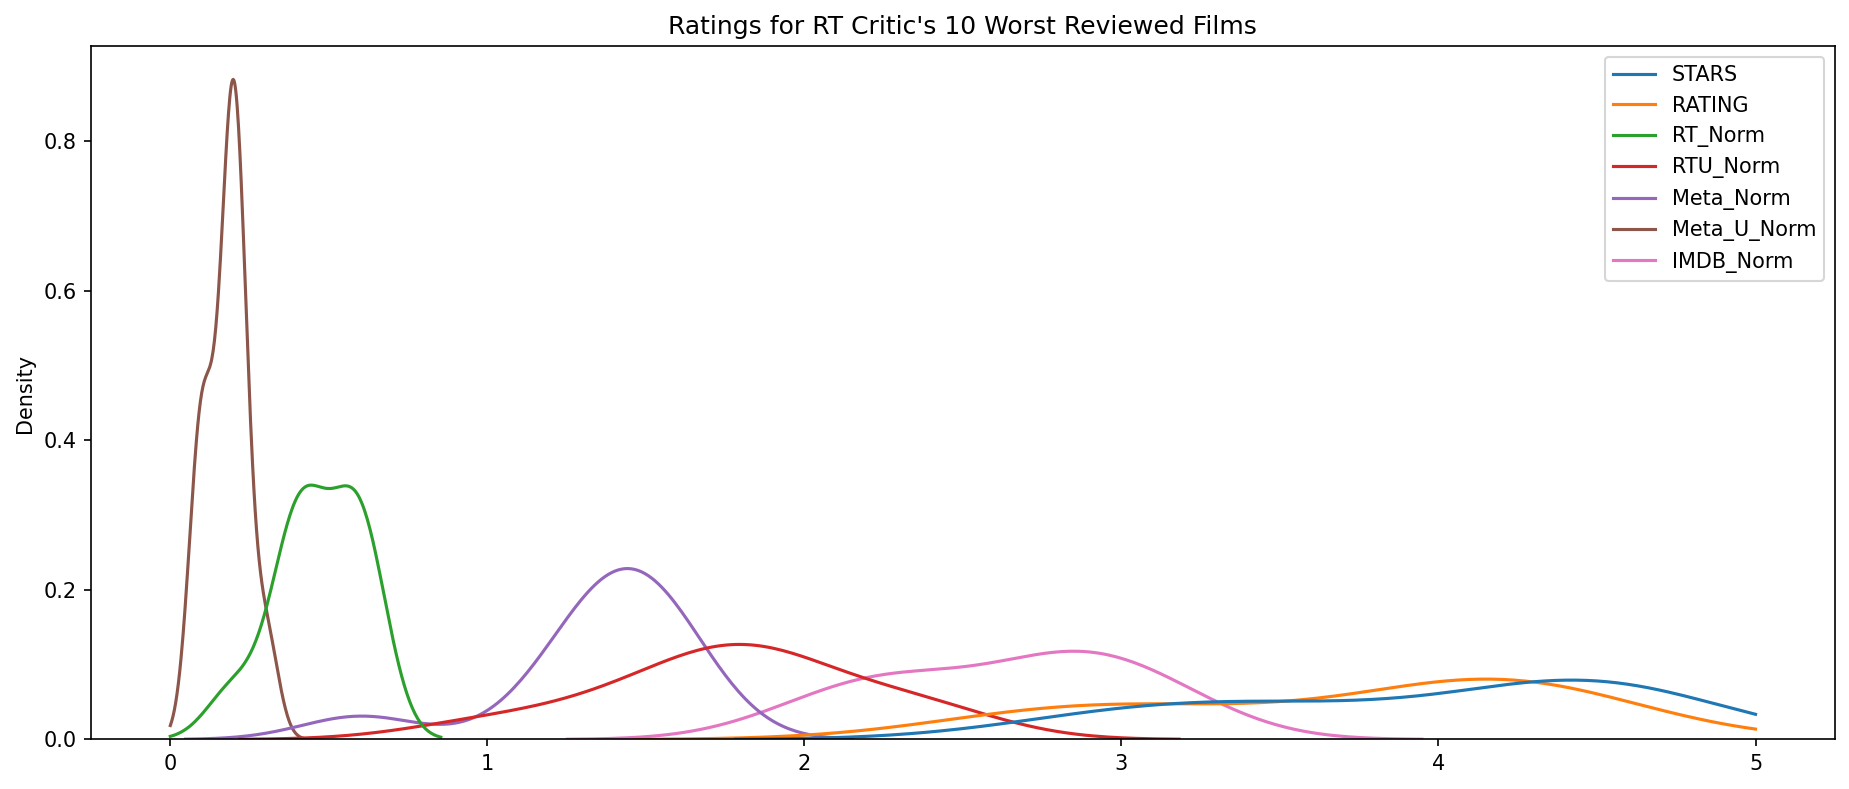

In [195]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],)
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [192]:
norm_films.iloc[25]

STARS                   4.5
RATING                  4.2
RT_Norm                 5.0
RTU_Norm                4.3
Meta_Norm               4.4
Meta_U_Norm             0.4
IMDB_Norm               3.8
FILM           Annie (2014)
Name: 25, dtype: object

In [193]:
0.4+2.3+1.3+2.3+3

9.3

In [194]:
9.3/5

1.86

----